         Date                        State  TotalSamples Negative  Positive
0  2020-04-17  Andaman and Nicobar Islands        1403.0     1210      12.0
1  2020-04-24  Andaman and Nicobar Islands        2679.0      NaN      27.0
2  2020-04-27  Andaman and Nicobar Islands        2848.0      NaN      33.0
3  2020-05-01  Andaman and Nicobar Islands        3754.0      NaN      33.0
4  2020-05-16  Andaman and Nicobar Islands        6677.0      NaN      33.0


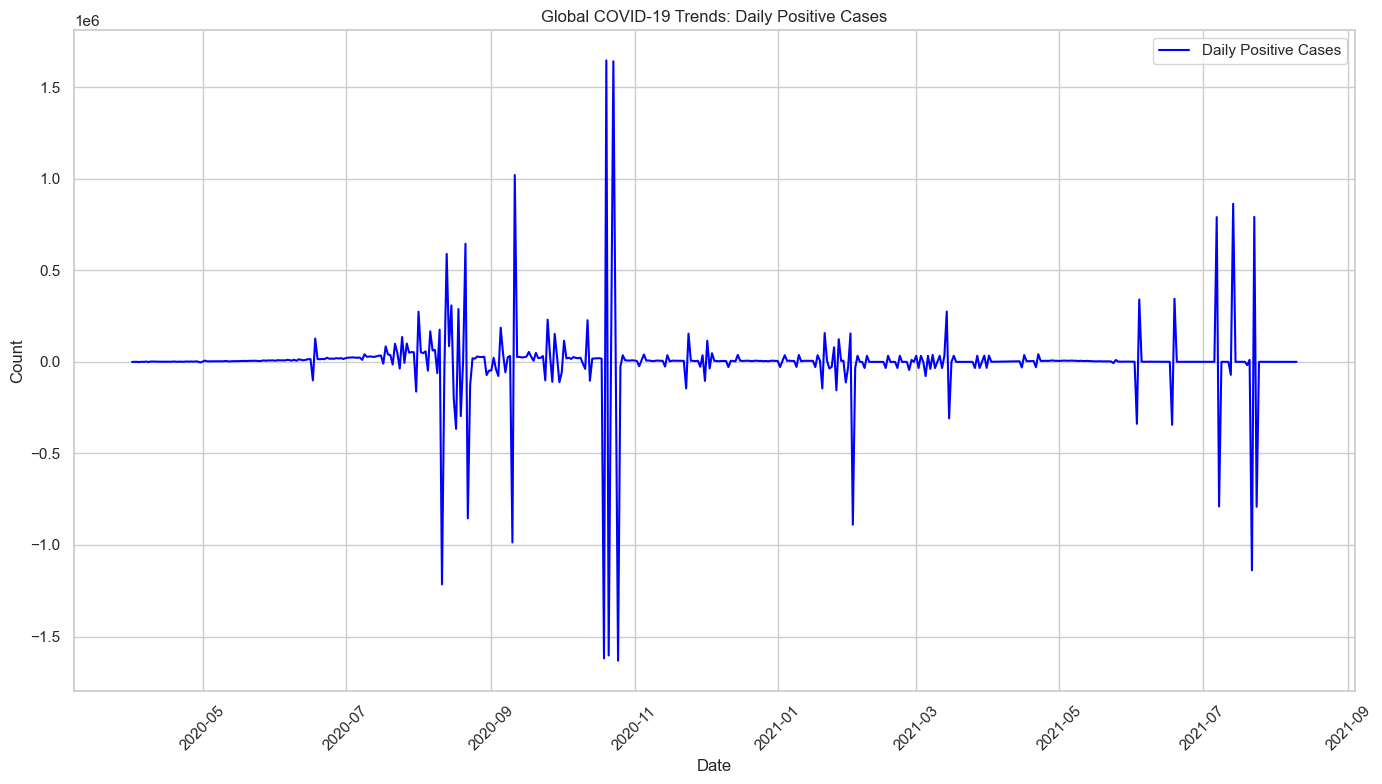

In [5]:
#  Project 2 : with COVID-19 Data Visualization,
# Analyze global COVID-19 trends, create visualizations to show daily cases, deaths, and recoveries.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Project 2 : Load the dataset (replace 'path_to_your_dataset.csv' with the actual path to the CSV file)
data = pd.read_csv("C:/Users/User/Desktop/Python/Ivoyant Projects/COVID-19/StatewiseTestingDetails.csv", encoding='ISO-8859-1')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
data.isnull().sum()

# Fill missing values if necessary
data.fillna(0, inplace=True)

# Check for duplicates and remove if needed
data.drop_duplicates(inplace=True)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Grouping data by date to calculate daily cases for positive
# If there is data for multiple states, we will aggregate the data at a national level
daily_data = data.groupby('Date').agg({'Positive': 'sum'}).reset_index()

# Calculate daily new cases (difference from the previous day)
daily_data['Daily_Positive_Cases'] = daily_data['Positive'].diff().fillna(0)

# Set plot style
sns.set(style="whitegrid")

# Plot daily positive cases
plt.figure(figsize=(14, 8))

plt.plot(daily_data['Date'], daily_data['Daily_Positive_Cases'], label='Daily Positive Cases', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global COVID-19 Trends: Daily Positive Cases')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
